In [1]:
import tensorflow as tf
import numpy as np
np.set_printoptions(linewidth=200)
print(tf.__version__)

2021-09-06 14:18:12.701130: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-06 14:18:12.701153: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.6.0


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

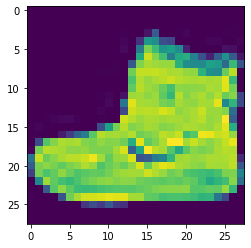

In [3]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [4]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [15]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]
)

In [16]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4850 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3607 - accuracy: 0.8679
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3267 - accuracy: 0.8795
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2877 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2737 - accuracy: 0.8977
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2607 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2508 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2388 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.230

In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 941us/step - loss: 0.3556 - accuracy: 0.8732


[0.355561226606369, 0.873199999332428]

In [8]:
classifications = model.predict(test_images)
print(classifications[0])

[2.8126813e-06 6.8087274e-07 3.7495690e-07 3.4078735e-07 4.7562075e-06 8.1407074e-03 3.9464130e-06 6.5471150e-02 8.4436950e-05 9.2629081e-01]


In [9]:
print(test_labels[0])

9


In [17]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=20, callbacks=[callbacks])

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8310
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3583 - accuracy: 0.8683
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3241 - accuracy: 0.8803
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.8889
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8967
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2649 - accuracy: 0.9006
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9059
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2422 - accuracy: 0.9089
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2313 - accuracy: 0.9140
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.221